In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [9]:
# Import JSON data into dataframe

# Solo tracks
solo_df = pd.read_json('./Datasets/solo_tracks_88rising.json')
solo_df.head()

,song name,album,artist,featured,release_date,length(ms),popularity,acousticness,danceability,energy,liveness,tempo,valence
0,Animal Farm,Animal Farm,BIBI,[BIBI],2022-09-27,203945,69,0.0178,0.617,0.570,0.5500,107.971,0.375
1,KAZINO,KAZINO,BIBI,[BIBI],2020-04-29,185946,65,0.1390,0.625,0.686,0.1100,133.041,0.263
2,BAD SAD AND MAD,Life is a Biâ¦,BIBI,[BIBI],2021-04-28,154988,64,0.5450,0.746,0.558,0.0904,90.013,0.638
3,"Very, Slowly",Twenty-Five Twenty-One OST Part 3,BIBI,[BIBI],2022-02-20,214851,60,0.6780,0.528,0.423,0.1670,135.917,0.249
4,MotoSpeed 24,Sweet Sorrow of Mother,BIBI,[BIBI],2022-10-24,133904,56,0.3190,0.610,0.597,0.1360,95.004,0.295


In [10]:
# Tracks with collaborations from 88 Rising artists
collabs_88_df = pd.read_json('./Datasets/collab_88rising.json')
collabs_88_df.head()

,song name,album,artist,featured,release_date,length(ms),popularity,acousticness,danceability,energy,liveness,tempo,valence
0,The Weekend,The Weekend,88rising,"[88rising, BIBI]",2021-10-14,167661,69,0.062000,0.784,0.521,0.0995,101.491,0.817
1,Best Lover,Head In The Clouds Forever,88rising,"[88rising, BIBI]",2022-04-16,152910,66,0.268000,0.740,0.663,0.1210,82.004,0.519
2,Crazy Like You (feat. BIBI),"Bare&Rare, Pt. 1",CHUNG HA,"[CHUNG HA, BIBI]",2022-07-11,175480,50,0.095700,0.536,0.639,0.2090,170.940,0.502
3,froyo (feat. Warren Hue),Head In The Clouds Forever,88rising,"[88rising, BIBI, Rich Brian]",2022-04-16,309121,45,0.213000,0.508,0.688,0.1570,145.089,0.335
4,These Nights,These Nights,88rising,"[88rising, Rich Brian]",2019-10-03,223006,41,0.000317,0.656,0.673,0.2800,83.018,0.494


In [11]:
# Collaborations with artists outside of 88 Rising
collab_out_df = pd.read_json('./Datasets/collab_outside_artists.json')
collab_out_df.head()

,song name,album,artist,featured,release_date,length(ms),popularity,acousticness,danceability,energy,liveness,tempo,valence
0,LAW (Prod. Czaer),Street Man Fighter Original Vol.3 (Mission by ...,Various Artists,"[Yoon Mirae, BIBI]",2022-09-06,189373,71,0.00857,0.756,0.900,0.2370,128.054,0.550
1,Never Gonna Come Down,Shang-Chi and The Legend of The Ten Rings: The...,88rising,"[Mark Tuan, BIBI]",2021-09-03,203800,51,0.65600,0.777,0.689,0.0620,150.036,0.873
2,AUTOMATIC,AUTOMATIC,Various Artists,"[Chancellor, Babylon, twlv]",2020-10-14,268293,51,0.13300,0.720,0.703,0.1210,99.999,0.492
3,Eleven (feat. BIBI),Blueline,twlv,"[twlv, BIBI]",2019-03-15,196520,46,0.14500,0.502,0.576,0.1700,89.897,0.205
4,Hanryang,Hanryang,Min Kyunghoon,"[Min Kyunghoon, KIM HEECHUL, BIBI]",2020-12-19,202866,49,0.06050,0.698,0.729,0.0918,140.083,0.306


## Collaboration Trends
Explore the collaborations data to see if there is any effect on popularity. This will include tracks with collaborations with artists both part of 88 Rising and outside of 88 Rising
- Does the number of artists in the collaboration effect song popularity?
- Which artist collaborations are the most popular?


In [28]:
# Combine 88 Rising solo, collabs and outside collabs data
all_df = pd.concat([collabs_88_df, collab_out_df, solo_df], axis=0)
all_df.head()

,song name,album,artist,featured,release_date,length(ms),popularity,acousticness,danceability,energy,liveness,tempo,valence
0,The Weekend,The Weekend,88rising,"[88rising, BIBI]",2021-10-14,167661,69,0.062000,0.784,0.521,0.0995,101.491,0.817
1,Best Lover,Head In The Clouds Forever,88rising,"[88rising, BIBI]",2022-04-16,152910,66,0.268000,0.740,0.663,0.1210,82.004,0.519
2,Crazy Like You (feat. BIBI),"Bare&Rare, Pt. 1",CHUNG HA,"[CHUNG HA, BIBI]",2022-07-11,175480,50,0.095700,0.536,0.639,0.2090,170.940,0.502
3,froyo (feat. Warren Hue),Head In The Clouds Forever,88rising,"[88rising, BIBI, Rich Brian]",2022-04-16,309121,45,0.213000,0.508,0.688,0.1570,145.089,0.335
4,These Nights,These Nights,88rising,"[88rising, Rich Brian]",2019-10-03,223006,41,0.000317,0.656,0.673,0.2800,83.018,0.494


In [30]:
print(len(all_df), len(collab_out_df), len(collabs_88_df), len(solo_df))

451 164 36 251


In [31]:
all_df['num_artists'] = all_df['featured'].apply(lambda x: len(x))
all_df.head()

,song name,album,artist,featured,release_date,length(ms),popularity,acousticness,danceability,energy,liveness,tempo,valence,num_artists
0,The Weekend,The Weekend,88rising,"[88rising, BIBI]",2021-10-14,167661,69,0.062000,0.784,0.521,0.0995,101.491,0.817,2
1,Best Lover,Head In The Clouds Forever,88rising,"[88rising, BIBI]",2022-04-16,152910,66,0.268000,0.740,0.663,0.1210,82.004,0.519,2
2,Crazy Like You (feat. BIBI),"Bare&Rare, Pt. 1",CHUNG HA,"[CHUNG HA, BIBI]",2022-07-11,175480,50,0.095700,0.536,0.639,0.2090,170.940,0.502,2
3,froyo (feat. Warren Hue),Head In The Clouds Forever,88rising,"[88rising, BIBI, Rich Brian]",2022-04-16,309121,45,0.213000,0.508,0.688,0.1570,145.089,0.335,3
4,These Nights,These Nights,88rising,"[88rising, Rich Brian]",2019-10-03,223006,41,0.000317,0.656,0.673,0.2800,83.018,0.494,2


### Number of Artists per song and track popularity
A bar plot of the number of artists featured in a song and the song popularity. (Note: 88rising will be considered as one artist)

In [32]:
# Group data by number of artists and taking the average of the popularity and audio features
num_art_grp = all_df.groupby("num_artists")
num_art_grp=num_art_grp.mean()
num_art_grp.head()

,length(ms),popularity,acousticness,danceability,energy,liveness,tempo,valence
num_artists,,,,,,,,
1,192300.314741,44.816733,0.385745,0.644884,0.583283,0.157935,122.583339,0.452216
2,191548.149254,43.395522,0.290008,0.702612,0.609897,0.170300,120.191045,0.499397
3,211788.090909,44.060606,0.274708,0.726061,0.655682,0.152873,119.776152,0.446202


In [37]:
num_art_grp.index

Int64Index([1, 2, 3], dtype='int64', name='num_artists')

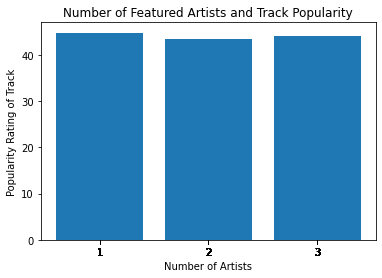

In [41]:
x_axis = num_art_grp.index
plt.bar(x_axis, num_art_grp['popularity'], align='center')
plt.title("Number of Featured Artists and Track Popularity")
plt.xlabel("Number of Artists")
plt.ylabel("Popularity Rating of Track")
plt.xticks(all_df['num_artists'])
plt.show()

The popularity rates are equal for different number of artists featured. Therefore, the number of featured artists does not effect popularity rates.

Is there any relationship between the number of artists and the audio features?
Audio Features:
- length(ms)
- acousticness
- danceability
- energy
- liveness
- tempo
- valence (the measure of positivity in tracks; how happy, cheerful, or euphoric the track is)

In [48]:
audio_feat = num_art_grp.columns
audio_feat

Index(['length(ms)', 'popularity', 'acousticness', 'danceability', 'energy',
       'liveness', 'tempo', 'valence'],
      dtype='object')

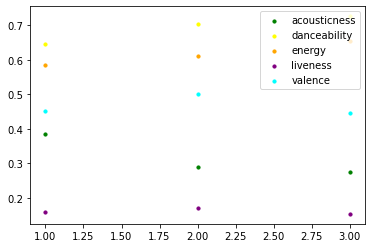

In [58]:
# Scatter plot of number of artists and the audio features
fig = plt.figure()
ax1 = fig.add_subplot(111)

#ax1.scatter(x_axis, num_art_grp[audio_feat[0]], s=10, c='b', label=audio_feat[0])
#ax1.scatter(x_axis, num_art_grp[audio_feat[1]], s=10, c='r', label=audio_feat[1])
ax1.scatter(x_axis, num_art_grp[audio_feat[2]], s=10, c='green', label=audio_feat[2])
ax1.scatter(x_axis, num_art_grp[audio_feat[3]], s=10, c='yellow', label=audio_feat[3])
ax1.scatter(x_axis, num_art_grp[audio_feat[4]], s=10, c='orange', label=audio_feat[4])
ax1.scatter(x_axis, num_art_grp[audio_feat[5]], s=10, c='purple', label=audio_feat[5])
#ax1.scatter(x_axis, num_art_grp[audio_feat[6]], s=10, c='magenta', label=audio_feat[6])
ax1.scatter(x_axis, num_art_grp[audio_feat[7]], s=10, c='cyan', label=audio_feat[7])

plt.legend(loc='upper right')
plt.show()

In [26]:

plt.bar(np.arange(len(all_df['num_artists'].unique)), all_df['popularity'], align='center')
plt.title("Number of Featured Artists and Track Popularity")
plt.xlabel("Number of Artists")
plt.ylabel("Popularity Rating of Track")
plt.xticks([x for x in np.arange(len(all_df['num_artists'].unique))], all_df['num_artists'], rotation="vertical")


TypeError: object of type 'method' has no len()